In [9]:
!kaggle datasets download -d mayankanand2701/oracle-stock-price-dataset
!unzip /content/oracle-stock-price-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/mayankanand2701/oracle-stock-price-dataset
License(s): MIT
oracle-stock-price-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/oracle-stock-price-dataset.zip
  inflating: Oracle Dataset.csv      


In [10]:
import pandas as pd

df = pd.read_csv('/content/Oracle Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-12,0.063272,0.064043,0.063272,0.063272,0.051487,393012000
1,1986-03-13,0.064815,0.065586,0.064815,0.064815,0.052742,125290800
2,1986-03-14,0.067130,0.067901,0.067130,0.067130,0.054626,57866400
3,1986-03-17,0.066358,0.066358,0.065586,0.065586,0.053370,28285200
4,1986-03-18,0.064815,0.064815,0.064043,0.064043,0.052114,32335200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9647 entries, 0 to 9646
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9647 non-null   object 
 1   Open       9647 non-null   float64
 2   High       9647 non-null   float64
 3   Low        9647 non-null   float64
 4   Close      9647 non-null   float64
 5   Adj Close  9647 non-null   float64
 6   Volume     9647 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 527.7+ KB


In [12]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", df.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols)

##########
데이터 타입 확인
Data Types:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Columns:
 Index(['Date'], dtype='object')
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


- Date: object (범주형 데이터) - 주식 데이터의 날짜를 나타냅니다.
- Open: float64 (수치형 데이터) - 거래일 시작 시의 주식 가격입니다.
- High: float64 (수치형 데이터) - 거래일 동안의 최고 주식 가격입니다.
- Low: float64 (수치형 데이터) - 거래일 동안의 최저 주식 가격입니다.
- Close: float64 (수치형 데이터) - 거래일 종료 시의 주식 가격입니다.
- Adj Close: float64 (수치형 데이터) - 조정된 종가로, 주식 분할이나 배당 등을 반영한 주식 가격입니다.
- Volume: int64 (수치형 데이터) - 거래된 주식의 수량입니다.

In [14]:
# 결측치 파악
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# 중복 데이터 파악
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


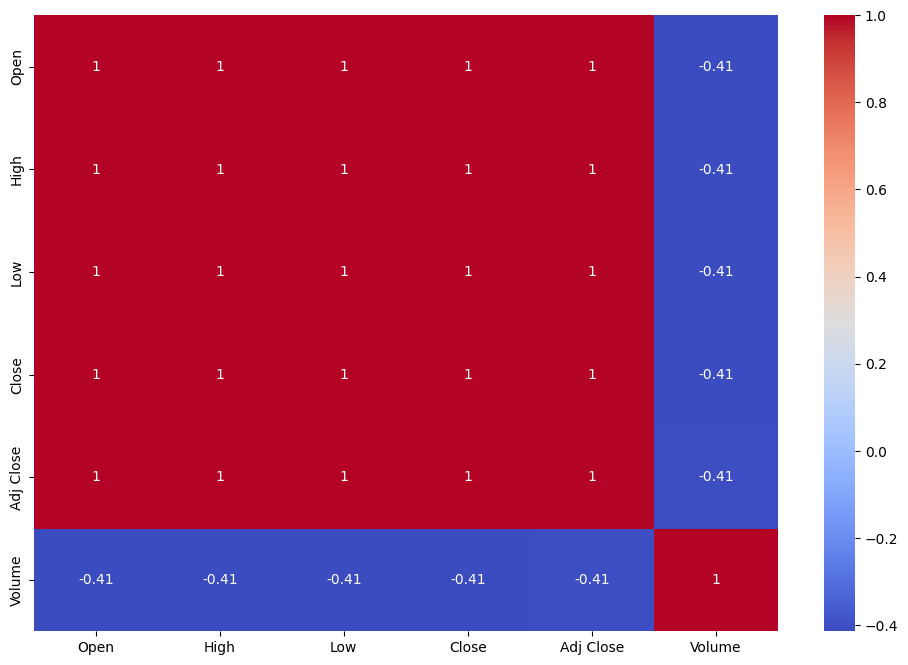

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 데이터만 포함하도록 필터링
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# 변수 간 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


- Close: float64 (수치형 데이터) 주식 종가를 예측하기 위함.
- Date: 주식의 날짜 데이터는 일반적으로 독립 변수로 사용되지 않지만, 시간에 따른 트렌드를 분석할 때는 사용할 수 있습니다.
- Open: 시작 가격은 종가에 영향을 미칠 수 있습니다.
- High: 최고가는 당일의 가격 변동을 나타낼 수 있습니다.
- Low: 최저가는 당일의 가격 변동을 나타낼 수 있습니다.
- Adj Close: 조정된 종가는 주식 분할이나 배당 등의 영향을 반영한 값으로, 분석에 유용할 수 있습니다.
- Volume: 거래량은 주식의 유동성과 관련이 있으며, 종가에 영향을 미칠 수 있습니다.

사용하려는 변수
- 조정된 종가, 즉. Oracle의 주식 가격이 조정된 후의 주식의 거래량 분석
- 사용변수: 'Adj Close','Volume'

In [41]:
from sklearn.preprocessing import StandardScaler

# 독립 변수와 종속 변수 설정
X = df[['Adj Close', 'Volume']]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 확인
X_scaled[:5]

array([[-0.92561518, -0.92757424, -0.92337506, -0.9254172 , -0.85767639,
        10.85417264],
       [-0.92555853, -0.92751815, -0.9233179 , -0.92536059, -0.85762891,
         2.72320997],
       [-0.92547355, -0.927434  , -0.92323213, -0.92527565, -0.85755764,
         0.67546298],
       [-0.92550189, -0.92749009, -0.92328933, -0.9253323 , -0.85760515,
        -0.22294787],
       [-0.92555853, -0.92754618, -0.9233465 , -0.92538891, -0.85765267,
        -0.09994529]])

In [42]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# K-평균 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# 클러스터링 결과 시각화 (PCA를 사용하여 2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


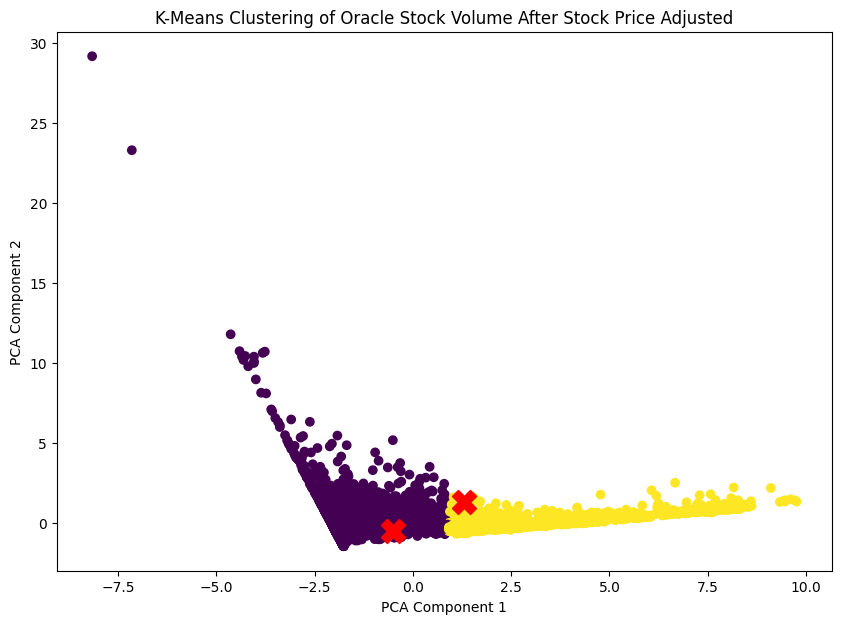

In [43]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Oracle Stock Volume After Stock Price Adjusted')
plt.show()


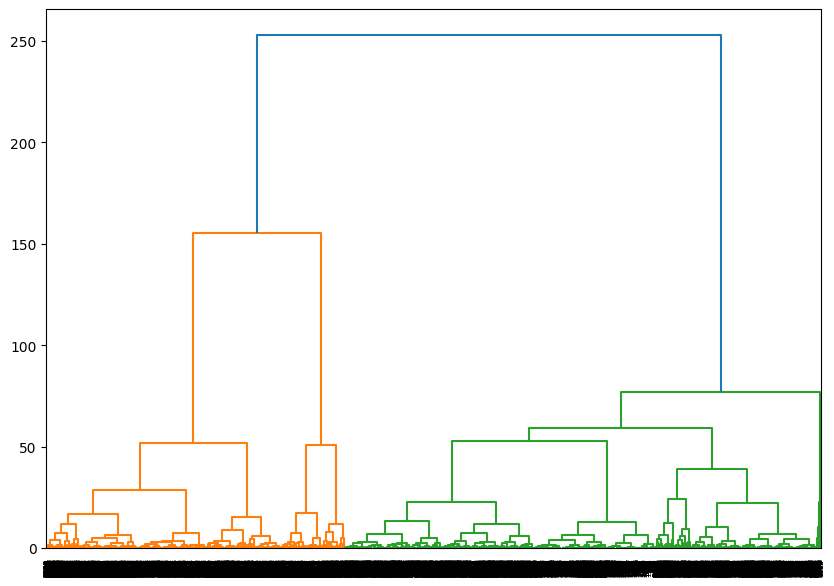

In [45]:
# 계층적 군집 분석 예제
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 독립 변수와 종속 변수 설정
X = df[['Adj Close', 'Volume']]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='ward')
labels = df.index.to_list()

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

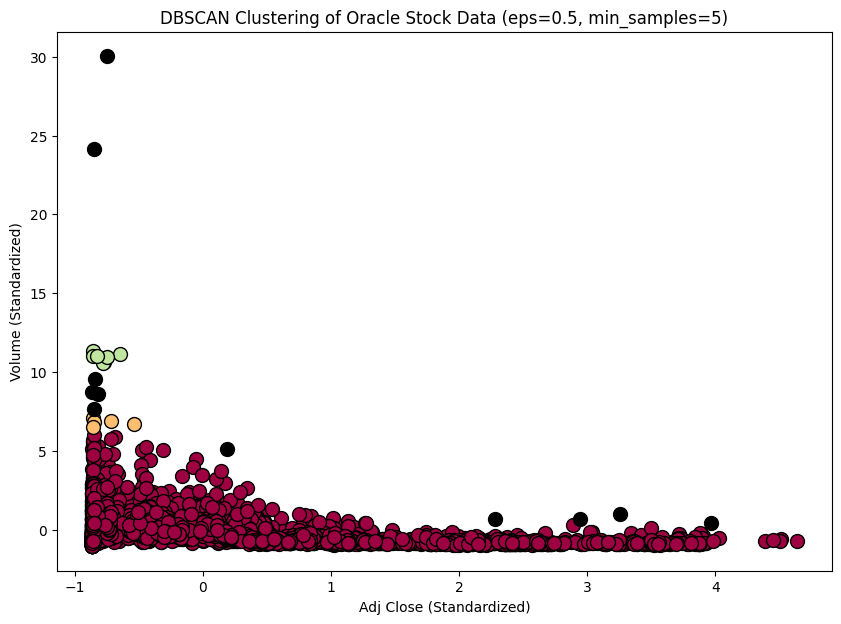

In [47]:
# DBSCAN
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 필요한 특성 선택 (Date 열 제외)
X = df[['Adj Close', 'Volume']]

# 훈련 세트와 테스트 세트로 분할 (테스트 세트의 비율을 20%로 설정)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 클러스터링 결과 시각화 (첫 번째 두 특징 공간 사용)
plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # 노이즈는 검정색으로 표시

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

plt.title('DBSCAN Clustering of Oracle Stock Data (eps=0.5, min_samples=5)')
plt.xlabel('Adj Close (Standardized)')
plt.ylabel('Volume (Standardized)')
plt.show()

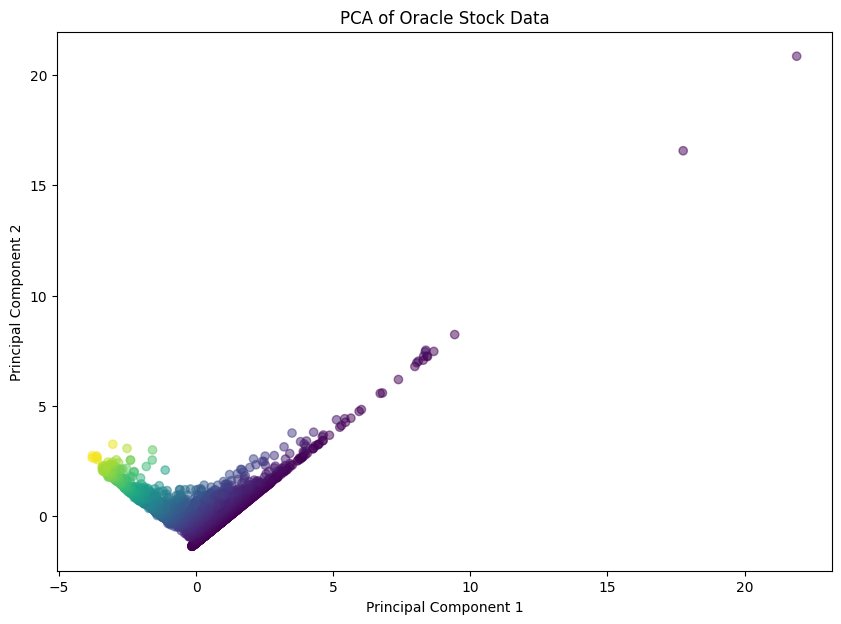

In [53]:
# 주성분 분석 (PCA) 예제

# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df[['Adj Close', 'Volume']]
y = df['Adj Close']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Oracle Stock Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

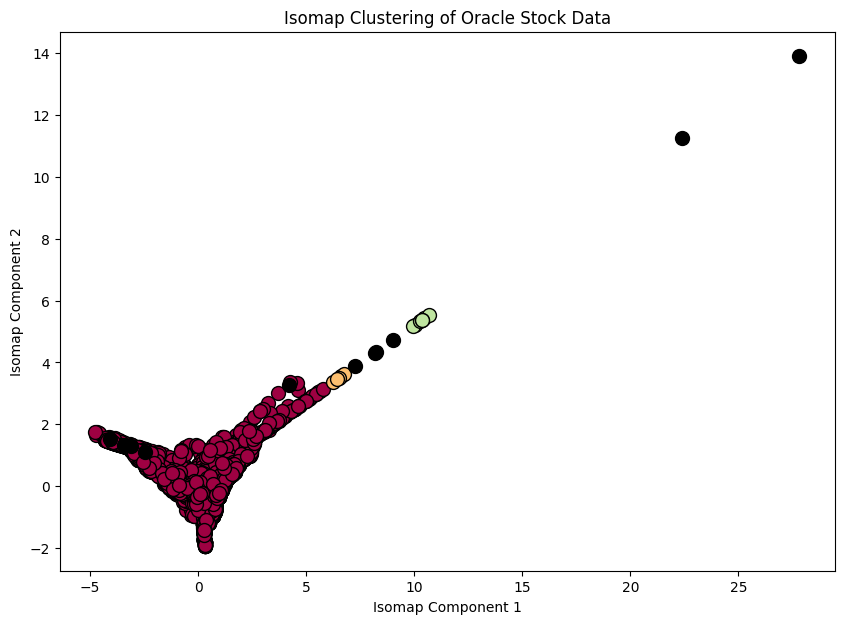

In [52]:
# Isomap

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

X = df[['Adj Close', 'Volume']]

# 훈련 세트와 테스트 세트로 분할 (테스트 세트의 비율을 20%로 설정)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Isomap 적용
isomap = Isomap(n_components=2, n_neighbors=5)
X_isomap = isomap.fit_transform(X_scaled)

# Isomap 결과 시각화 (DBSCAN 클러스터 라벨 사용)
plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # 노이즈는 검정색으로 표시

    class_member_mask = (labels == k)
    xy = X_isomap[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap Clustering of Oracle Stock Data')
plt.show()

In [55]:
# t-SNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# t-SNE 결과 시각화
plt.figure(figsize=(10, 7))
for target in np.unique(y):
    plt.scatter(X_tsne[labels == k, 0], X_tsne[labels == k, 1], label=f'Cluster {k}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Iris Dataset')
plt.legend()
plt.show()

ValueError: Image size of 841x128757 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x700 with 1 Axes>